In [2]:
import numpy as np
import pandas as pd

In [3]:
df_hbo = pd.read_csv('hbo.csv')
df_claro = pd.read_csv('claro.csv')
df_sony = pd.read_csv('sony.csv')
df_netflix = pd.read_csv('netflix.csv')
df_flow = pd.read_csv('flow.csv')
df_amazon = pd.read_csv('amazon.csv')
df_on_video = pd.read_csv('on_video.csv')
df_fox = pd.read_csv('fox.csv')

In [4]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31


In [5]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53


In [6]:
print(len(df_hbo.index))
print(len(df_claro.index))
print(len(df_amazon.index))
print(len(df_netflix.index))
print(len(df_flow.index))
print(len(df_on_video.index))
print(len(df_sony.index))
print(len(df_fox.index))

140
1758
774
1611
374
314
56
241


In [7]:
# ===> Unimos los diferentes dataframes

frames = [df_hbo, df_claro, df_amazon, df_netflix, df_flow, df_on_video, df_sony, df_fox]

df = pd.concat(frames)

In [8]:
print(len(df.index))

5268


In [9]:
df = df.drop_duplicates(subset=['id'])

In [10]:
df = df.drop_duplicates(subset=['title_original'])

In [11]:
print(len(df.index)) # Pareciera que no se comparten tantas peliculas

4445


In [12]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

df['keywords']=df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['keywords']=df['keywords'].str.split(',')

df['director']=df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['director']=df['director'].str.split(',')

df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast']=df['cast'].str.split(',')

In [13]:
# ===> Vamos a crear el vector a partir de los datos en el array de una columna

# ===> Creamos la lista de valores unicos

def create_unique_list(dataframe, column):
    
    list_unique_items = []
    
    for index, row in dataframe.iterrows():
        list_items = row[column]
    
        for item in list_items:
            if item not in list_unique_items:
                list_unique_items.append(item)
            
    return list_unique_items

# ===> binary va iterar sobre los valores de un array y chequear que valores estan en la lista de valores unicos

def binary(list_items, list_unique_items):
    
    binaryList = []
    
    for item in list_unique_items:
        if item in list_items:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# ===> create_vector nos va a devolver el dataframe con una nueva columna, que representa un vector binario del atributo
# ===> en cuestion (genero, cast, director, etc)

def create_vector(dataframe, column_name):
    
    unique_list = create_unique_list(dataframe, column_name)
    
    column_name_vector = column_name + '_bin'
    
    dataframe[column_name_vector] = dataframe[column_name].apply(lambda x: binary(x, unique_list))
    
    return dataframe

In [14]:
df = create_vector(df, 'keywords')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [15]:
df = create_vector(df, 'genres')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
df = create_vector(df, 'director')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [17]:
df = create_vector(df, 'cast')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin,cast_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."


In [18]:
# ===> Tenemos el dataframe con todas las peliculas. Vamos a crear una columna que sea una combinacion
# ===> de todos los bins del dataframe

df['combination_bin'] = df['genres_bin'] + df['cast_bin'] +  df['keywords_bin'] + df['director_bin']

In [19]:
# ===> Transformamos esa columna en numpy array de dos dimensiones, lo cual es necesario para poder utilizar esa info
# ===> como inputs de modelos de clustering

df_kmeans = np.vstack(df['combination_bin'])

In [20]:
# ===> Nuestro dataframe tiene 22443 dimensiones

print(len(df_kmeans[0]))

22359


In [21]:
# ===> Vamos a usar SVD para reducir la dimensionalidad de nuestro dataframe
# ===> Otra opcion https://www.researchgate.net/post/Which_clustering_technique_is_most_suitable_for_high_dimensional_data_sets

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(50, random_state=0)
df_transformed = svd.fit_transform(df_kmeans)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabaz_score

In [23]:
kmeans_final = KMeans(n_clusters=10, random_state=0) 
kmeans_final.fit(df_transformed)
    
labels_final = kmeans_final.labels_

In [24]:
 df['labels'] = labels_final

In [25]:
print(df['labels'].unique())

[9 3 2 0 8 6 1 7 4 5]


In [26]:
df_labels_counts = pd.DataFrame(df['labels'].value_counts())

In [27]:
df_labels_counts['percentage'] = df_labels_counts['labels']/len(df.index)*100

In [28]:
df_labels_counts['clusters'] = df_labels_counts.index

In [29]:
df_labels_counts = df_labels_counts.sort_values(by='percentage', ascending=True)

In [30]:
df_labels_counts

,labels,percentage,clusters
9,331,7.446569,9
2,339,7.626547,2
7,351,7.896513,7
0,351,7.896513,0
3,370,8.323960,3
4,381,8.571429,4
1,414,9.313836,1
6,440,9.898763,6
5,729,16.400450,5
8,739,16.625422,8


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

height = df_labels_counts['percentage'].tolist()
bars = df_labels_counts['clusters'].tolist()
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)

 #color=['#3f9bdf','#3f9bdf','#3f9bdf','#3f9bdf','red','#3f9bdf','#3f9bdf','#3f9bdf','#3f9bdf','#3f9bdf']
    
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title("Tamaño de los clusters", fontsize=28)
plt.ylabel("Clusters", fontsize=20)
plt.xlabel("Porcentaje del total de peliculas \n que pertenecen a un cluster", fontsize=20)
# Show graphic
plt.show()


<Figure size 640x480 with 1 Axes>

In [32]:
# ===> Funciones que nos van a permitir realizar words clouds a partir de agregar palabras de un atributo especifico
# ===> (genero, actores, etc) de las peliculas de un cluster

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

def remove_one_from_word(dict):
    
    new_dict = dict.copy()
    
    for key, value in new_dict.items():
        
        new_dict[key] = new_dict[key] - 1
    
    return new_dict

def remove_single_items(dictionary): 
    
    main_dict = remove_one_from_word(dictionary)
    
    new_dict = {}
    
    for key, value in main_dict.items(): 

        if main_dict[key] > 0:
            new_dict[key] = main_dict[key]

    return new_dict
        
def word_cloud_words_cluster(dataframe, label, attribute):
    
    array_words = []
    
    dataframe_filter = dataframe[dataframe['labels']==label]
    
    for item in dataframe_filter[attribute]:
        
        array_words = array_words + item
    
    word_counter = Counter(array_words)
    
    words_not_unique = remove_single_items(word_counter)
    
    wordcloud = WordCloud( background_color='white').generate_from_frequencies(words_not_unique)
    
    return wordcloud

    # Display the generated image:
   # plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off")
    #plt.show()

In [33]:
def plot_words_clouds(dataframe, label):
    
    word_cloud_genre = word_cloud_words_cluster(dataframe, label, 'genres')
    word_cloud_keywords = word_cloud_words_cluster(dataframe, label, 'keywords')
    word_cloud_cast = word_cloud_words_cluster(dataframe, label, 'cast')
    word_cloud_director = word_cloud_words_cluster(dataframe, label, 'director')
    
    fig, [[ax1, ax2], [ax3, ax4] ]= plt.subplots(nrows=2, ncols=2, figsize=(25,10))

    ax1.imshow(word_cloud_genre, interpolation='bilinear')
    #ax1.axis('equal')
    ax1.set_title("Genres", fontsize=28)
    ax1.axis("off")
    
    ax2.imshow(word_cloud_keywords, interpolation='bilinear')
    #ax2.axis('equal')
    ax2.set_title("Keywords", fontsize=28)
    ax2.axis("off")
    
    ax3.imshow(word_cloud_cast, interpolation='bilinear')
    #ax3.axis('equal')
    ax3.set_title("Cast", fontsize=28)
    ax3.axis("off")
    
    ax4.imshow(word_cloud_director, interpolation='bilinear')
    #ax3.axis('equal')
    ax4.set_title("Director", fontsize=28)
    ax4.axis("off")
    
    plt.show()

In [34]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [35]:
# ===> Analizamos la composicion de los clusters que se formaron

z = widgets.Label(value="Selecciona un cluster: ")
display(z)

def pltsin(cluster):
    plot_words_clouds(df, cluster)

interact(pltsin, cluster=df_labels_counts['clusters'].tolist())

Label(value='Selecciona un cluster: ')

interactive(children=(Dropdown(description='cluster', options=(9, 2, 7, 0, 3, 4, 1, 6, 5, 8), value=9), Output…

<function __main__.pltsin(cluster)>

In [36]:
from sklearn.cluster import DBSCAN
from scipy.stats import itemfreq

# Los resultados no son buenos. Se arma un solo cluster enorme y muchos clausters chicos de no mas de 10 unidades

#epsilon_values = [1,2,3,4,5,6,7]

#min_samples_values = [3,6,9,12]

#for ep_value in epsilon_values:
    
#    for min_sample_value in min_samples_values:
        
        #clustering = DBSCAN(eps=ep_value, min_samples=min_sample_value).fit(df_transformed)
        #labels_final_dbscan = clustering.labels_
        #print("epsilon_value=", ep_value)
        #print("min_sample_value=", min_sample_value)
        #print(itemfreq(labels_final_dbscan))

In [37]:
#df['labels_dbscan'] = labels_final_dbscan

In [38]:
#pd.DataFrame(df['labels_dbscan'].value_counts())

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet,fcluster
from scipy.cluster import  hierarchy
from sklearn.metrics.pairwise import cosine_distances

#df_jerarquico = df_kmeans.copy()
#D = cosine_distances(df_jerarquico, df_jerarquico)
#Z = hierarchy.linkage(D, "ward")
#threshold = 35
#C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [40]:
# pd.Series(C).value_counts()

In [41]:
# df['labels'] = C

In [42]:
svd_2 = TruncatedSVD(2, random_state=0)
df_transformed_2_dim = svd_2.fit_transform(df_kmeans)

In [43]:
print(df_transformed_2_dim)

[[ 0.75296203 -0.83553914]
 [ 1.16523549 -0.92160774]
 [ 0.40621195 -0.56822116]
 ...
 [ 0.12476055  0.04780932]
 [ 0.68562745 -0.24522724]
 [ 1.29463568  0.0228539 ]]


In [44]:
print(len(df_transformed_2_dim))

4445


In [45]:
df_transformed_2_dim_reduced = df_transformed_2_dim[400:450]

In [46]:
print(df.columns.values)

['Unnamed: 0' 'Unnamed: 0.1' 'id' 'title' 'title_original' 'genres'
 'director' 'keywords' 'cast' 'genre_empty' 'keywords_bin' 'genres_bin'
 'director_bin' 'cast_bin' 'combination_bin' 'labels']


In [47]:
df[df['labels']==3]

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin,cast_bin,combination_bin,labels
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,37,37,3979,Addicted,Addicted,"[Drama, Suspense]",[BilleWoodruff],"[infidelity, obsession, lie, sin, interracialr...","[BorisKodjoe, BrandonGonzales, CameronMills, E...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
11,86,86,8723,Antes que el diablo sepa que has muerto,Before the Devil Knows You're Dead,"[Crimen, Drama, Suspense]",[SidneyLumet],"[siblingrelationship, office, drugaddiction, h...","[PhilipSeymourHoffman, EthanHawke, AlbertFinne...",31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
27,260,260,21117,Falcone: Un Juez contra la Mafia,Excellent Cadavers,"[Drama, Suspense]",[RickyTognazzi],[gangster],"[ChazzPalminteri, F.MurrayAbraham, AnnaGaliena...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
85,861,861,60908,Milla blanca,White Mile,"[Drama, Suspense]",[RobertButler],[sport],"[AlanAlda, PeterGallagher, RobertLoggia, Bruce...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
95,995,995,68588,Edge of Winter,Edge of Winter,"[Drama, Suspense]",[RobConnolly],"[parentchildrelationship, winter, stranded, ps...","[JoelKinnaman, TomHolland, RachelleLefevre, Pe...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
106,1123,1123,74374,Al final del túnel,Al final del túnel,"[Crimen, Suspense]",[RodrigoGrande],"[rain, wheelchair, computer, stripper, bankrob...","[LeonardoSbaraglia, PabloEcharri, ClaraLago, F...",22,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
107,1125,1125,74375,La llegada,Arrival,"[Suspense, Drama, Cienciaficción, Misterio]",[DenisVilleneuve],"[spacecraft, language, loss, romance, alien, f...","[AmyAdams, JeremyRenner, ForestWhitaker, Micha...",52,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",3
110,1165,1165,75317,Coin Locker Girl,차이나타운,"[Drama, Suspense]",[HanJun-hee],"[murder, dysfunctionalfamily, debtcollector, c...","[KimHye-soo, KimGo-eun, UmTae-goo, ParkBo-gum,...",21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
def add_cluster_if_not_present(dataframe, list_clusters_complete):
    
    list_clusters = dataframe['labels'].unique()
    
    for item in list_clusters_complete:
        
        if item not in list_clusters:
            
            dataframe = dataframe.append({'labels': item, 'frecuency': 0}, ignore_index=True)
            
    return dataframe
    

In [49]:
# ===> Aanaliamos que % de las peliculas de cada plataforma pertenecen a cada cluster

def count_clusters(dataframe, name_plataform):

    df_clusters = pd.DataFrame(dataframe['labels'].value_counts())
    
    df_clusters = df_clusters.rename(columns={'labels': 'frecuency'})
    
    df_clusters['labels'] = df_clusters.index
    
    df_clusters = add_cluster_if_not_present(df_clusters, df['labels'].unique())
    
    def number_rows_parent_dataframe(dataframe):
        return len(dataframe.index)

    def cluster_porcentage(value, dataframe=dataframe):
        return value/number_rows_parent_dataframe(dataframe)*100
    
    name_column = 'percentage_clusters_' + name_plataform 
    
    df_clusters[name_column] = df_clusters['frecuency'].apply(cluster_porcentage)

    return df_clusters


In [50]:
# ===> Agregamos las etiquetas de clusters a la plataforma HBO

df_hbo = pd.merge(df_hbo, df[['id', 'labels']], on='id', how='left')

In [51]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32,9
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31,3


In [52]:
clusters_hbo = count_clusters(df_hbo, 'hbo')
count_clusters(df_hbo, 'hbo').head(2)

,frecuency,labels,percentage_clusters_hbo
5,26,5,18.571429
6,21,6,15.000000


In [53]:
# ===> Agregamos las etiquetas de clusters a la plataforma Claro

df_claro = pd.merge(df_claro, df[['id', 'labels']], on='id', how='left')

In [54]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31,4.0
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53,7.0


In [55]:
clusters_claro = count_clusters(df_claro, 'claro')
count_clusters(df_claro, 'claro').head(2)

,frecuency,labels,percentage_clusters_claro
5.0,263,5.0,14.960182
8.0,248,8.0,14.106940


In [56]:
# ===> Agregamos las etiquetas de clusters a la plataforma Sony

df_sony = pd.merge(df_sony, df[['id', 'labels']], on='id', how='left')

In [57]:
clusters_sony = count_clusters(df_sony, 'sony')

count_clusters(df_sony, 'sony').head(2)

,frecuency,labels,percentage_clusters_sony
0,10,7,17.857143
1,9,5,16.071429


In [58]:
# ===> Agregamos las etiquetas de clusters a la plataforma Netflix

df_netflix = pd.merge(df_netflix, df[['id', 'labels']], on='id', how='left')

In [59]:
clusters_netflix = count_clusters(df_netflix, 'netflix')

count_clusters(df_netflix, 'netflix').head(2)

,frecuency,labels,percentage_clusters_netflix
6.0,301,6.0,18.684047
8.0,291,8.0,18.063315


In [60]:
# ===> Agregamos las etiquetas de clusters a la plataforma Flow

df_flow = pd.merge(df_flow, df[['id', 'labels']], on='id', how='left')

In [61]:
clusters_flow = count_clusters(df_flow, 'flow')

count_clusters(df_flow, 'flow').head(2)

,frecuency,labels,percentage_clusters_flow
8.0,73,8.0,19.518717
5.0,50,5.0,13.368984


In [62]:
# ===> Agregamos las etiquetas de clusters a la plataforma Amazon

df_amazon = pd.merge(df_amazon, df[['id', 'labels']], on='id', how='left')

In [63]:
clusters_amazon = count_clusters(df_amazon, 'amazon')

count_clusters(df_amazon, 'amazon').head(2)

,frecuency,labels,percentage_clusters_amazon
5.0,137,5.0,17.700258
8.0,127,8.0,16.408269


In [64]:
# ===> Agregamos las etiquetas de clusters a la plataforma On Video

df_on_video = pd.merge(df_on_video, df[['id', 'labels']], on='id', how='left')

In [65]:
clusters_on_video = count_clusters(df_on_video, 'on_video')

count_clusters(df_on_video, 'on_video').head(2)

,frecuency,labels,percentage_clusters_on_video
5.0,58,5.0,18.471338
7.0,44,7.0,14.012739


In [66]:
# ===> Agregamos las etiquetas de clusters a la plataforma Fox

df_fox = pd.merge(df_fox, df[['id', 'labels']], on='id', how='left')

In [67]:
clusters_fox = count_clusters(df_fox, 'fox')

count_clusters(df_fox, 'fox').head(2)

,frecuency,labels,percentage_clusters_fox
8.0,54,8.0,22.406639
5.0,37,5.0,15.352697


In [68]:
df_clusters_final = pd.merge(clusters_hbo[['labels', 'percentage_clusters_hbo']], clusters_claro[['labels', 'percentage_clusters_claro']], on='labels', how='left')

In [69]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro
0,5,18.571429,14.960182
1,6,15.000000,2.559727


In [70]:
df_clusters_final = pd.merge(df_clusters_final, clusters_sony[['labels', 'percentage_clusters_sony']], on='labels', how='left')

In [71]:
df_clusters_final = pd.merge(df_clusters_final, clusters_netflix[['labels', 'percentage_clusters_netflix']], on='labels', how='left')

In [72]:
df_clusters_final = pd.merge(df_clusters_final, clusters_flow[['labels', 'percentage_clusters_flow']], on='labels', how='left')

In [73]:
df_clusters_final = pd.merge(df_clusters_final, clusters_amazon[['labels', 'percentage_clusters_amazon']], on='labels', how='left')

In [74]:
df_clusters_final = pd.merge(df_clusters_final, clusters_on_video[['labels', 'percentage_clusters_on_video']], on='labels', how='left')

In [75]:
df_clusters_final = pd.merge(df_clusters_final, clusters_fox[['labels', 'percentage_clusters_fox']], on='labels', how='left')

In [76]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,5,18.571429,14.960182,16.071429,14.649286,13.368984,17.700258,18.471338,15.352697
1,6,15.000000,2.559727,0.000000,18.684047,4.545455,7.881137,2.229299,2.074689


In [77]:
print(df_clusters_final['labels'].values)

[5 6 7 8 2 9 1 0 4 3]


In [78]:
# ===> Analizamos que porcentaje tiene cada plataforma de cada contenido
#(bar chart horizontal con los cluster en el eje y y el porcentaje en el x) Tenemos que ver si podemos marcar una plataforma en especial



In [79]:
# ===> Comparamos los tipos de contenido que tienen dos plataformas especificas
#(un grafico con dos plot lines por ahi es lo mejor para mostrar la diferencia)



In [80]:
# ===> Ver como el cambio de contenido afecta las distancias
# (el usuario puede seleccionar una plataforma y puede seleccionar que cantidad de contenido tiene de cada tipo)
# (ademas, )

In [81]:
df_clusters_final_transpose = df_clusters_final[['percentage_clusters_hbo',	'percentage_clusters_claro',	'percentage_clusters_sony',	'percentage_clusters_netflix'	,'percentage_clusters_flow',	'percentage_clusters_amazon',	'percentage_clusters_on_video',	'percentage_clusters_fox']].transpose()

In [82]:
df_clusters_final_transpose.columns = df_clusters_final['labels'].values

In [83]:
df_clusters_final_transpose.head(2)

,5,6,7,8,2,9,1,0,4,3
percentage_clusters_hbo,18.571429,15.000000,10.000000,9.285714,9.285714,7.857143,7.857143,7.857143,7.142857,7.142857
percentage_clusters_claro,14.960182,2.559727,11.262799,14.106940,9.499431,9.215017,7.337884,10.978385,10.921502,8.873720


In [84]:
df_clusters_final_transpose['platform_percentages'] = df_clusters_final_transpose.index

In [85]:
df_clusters_final_transpose.head(2)

,5,6,7,8,2,9,1,0,4,3,platform_percentages
percentage_clusters_hbo,18.571429,15.000000,10.000000,9.285714,9.285714,7.857143,7.857143,7.857143,7.142857,7.142857,percentage_clusters_hbo
percentage_clusters_claro,14.960182,2.559727,11.262799,14.106940,9.499431,9.215017,7.337884,10.978385,10.921502,8.873720,percentage_clusters_claro


In [86]:
df_numpy_array_platforms = df_clusters_final_transpose.loc[:, df_clusters_final_transpose.columns != 'platform_percentages'].values

In [87]:
def show_pie_chart_content_platform(platform):
    
    name_platform = 'percentage_clusters_' + platform
    
    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

    percentages = df_clusters_final[name_platform].tolist()
    labels_clusters = df_clusters_final['labels'].tolist()
    
    plt.pie(percentages, labels=labels_clusters, autopct='%1.1f%%')
    plt.title("Contenido de la plataforma", fontsize=28)
    plt.show()
    

In [88]:
# ===> Analizamos que tipo de contenido tiene cada plataforma

label_platform_content = widgets.Label(value="Selecciona una plataforma: ")
display(label_platform_content)

def pltsin(platform):
    show_pie_chart_content_platform(platform)

interact(pltsin, platform=['hbo', 'claro', 'sony', 'netflix', 'flow', 'amazon', 'on_video', 'fox'])

Label(value='Selecciona una plataforma: ')

interactive(children=(Dropdown(description='platform', options=('hbo', 'claro', 'sony', 'netflix', 'flow', 'am…

<function __main__.pltsin(platform)>

In [89]:
def clean_name_platforms(array_platforms):
    
    array_of_clean_names = []
    
    for item in array_platforms:
        
        name_clean = item.replace('percentage_clusters_','')
        
        array_of_clean_names.append(name_clean)
        
    return array_of_clean_names

In [90]:
def array_of_colors(array_platforms, name_platform):
    
    name_platform_final= 'percentage_clusters_' + name_platform
    
    array_of_colors = ['#3f9bdf']*len(array_platforms)
    
    position = array_platforms.index(name_platform_final)
    
    array_of_colors[position] = 'red'
    
    return array_of_colors

In [91]:

def show_bar_chart_percentage_clusters_platforms(cluster, platform):
    
    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    
    df_clusters_final_transpose_copy = df_clusters_final_transpose.sort_values(by=cluster, ascending=True)
    
    height = df_clusters_final_transpose_copy[cluster].tolist()
    
    bars = clean_name_platforms(df_clusters_final_transpose_copy['platform_percentages'].tolist())
    
    colors = array_of_colors(df_clusters_final_transpose_copy['platform_percentages'].tolist(), platform)  
    
    y_pos = np.arange(len(bars))

    plt.barh(y_pos, height, color=colors)

    plt.yticks(y_pos, bars, fontsize=15)
    plt.title("Porcentage del contenido total de cada plataforma \n que corresponde al cluster "+ str(cluster), fontsize=20)
    plt.ylabel("Plataformas", fontsize=17)
    plt.xlabel("Porcentaje del total de peliculas \n que pertenecen al cluster " + str(cluster), fontsize=17)

    plt.show()

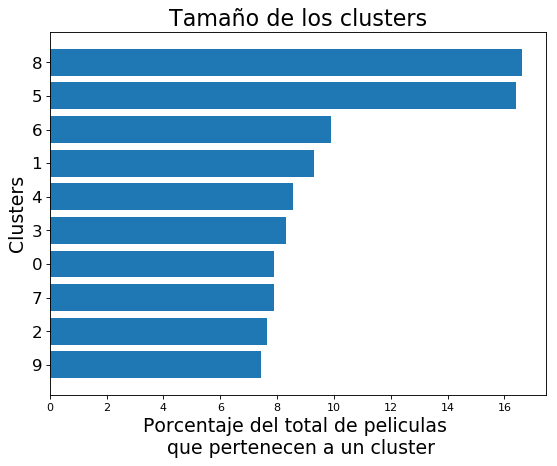

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

height = df_labels_counts['percentage'].tolist()
bars = df_labels_counts['clusters'].tolist()
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
    
# Create names on the y-axis
plt.yticks(y_pos, bars, fontsize=15)
plt.title("Tamaño de los clusters", fontsize=20)
plt.ylabel("Clusters", fontsize=17)
plt.xlabel("Porcentaje del total de peliculas \n que pertenecen a un cluster", fontsize=17)
# Show graphic
plt.show()

In [93]:
# Comparemos porcentage del contenido total de cada plataforma que corresponde a cada cluster

label_platform_content = widgets.Label(value="Selecciona una plataforma y un cluster: ")
display(label_platform_content)

def pltsin_compare_clusters(cluster, platform):
    show_bar_chart_percentage_clusters_platforms(cluster, platform)

interact(pltsin_compare_clusters, platform=['hbo', 'claro', 'sony', 'netflix', 'flow', 'amazon', 'on_video', 'fox'], cluster=[1,2,3,4,5,6,7,8,9])

Label(value='Selecciona una plataforma y un cluster: ')

interactive(children=(Dropdown(description='cluster', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(…

<function __main__.pltsin_compare_clusters(cluster, platform)>

In [94]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,5,18.571429,14.960182,16.071429,14.649286,13.368984,17.700258,18.471338,15.352697
1,6,15.000000,2.559727,0.000000,18.684047,4.545455,7.881137,2.229299,2.074689


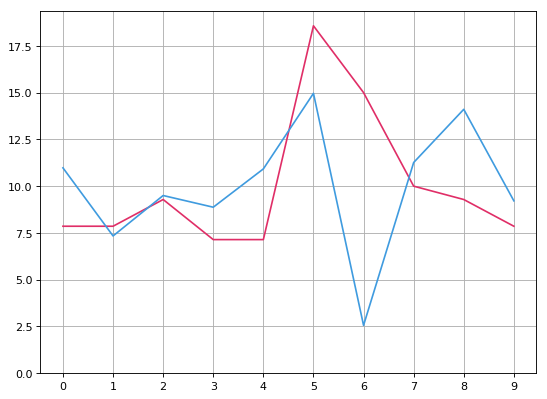

In [95]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x = np.linspace(0, 10, 4)

df_clusters_final_copy = df_clusters_final.sort_values(by='labels', ascending=True)

plt.plot(df_clusters_final_copy['labels'].tolist(), df_clusters_final_copy['percentage_clusters_hbo'].tolist(), color='#e02e67') # specify color by name

# 

plt.plot(df_clusters_final_copy['labels'].tolist(), df_clusters_final_copy['percentage_clusters_claro'].tolist(), color='#3f9bdf') # specify color by name


plt.ylim(ymin=0)

plt.xticks(np.arange(min(df_clusters_final_copy['labels'].tolist()), max(df_clusters_final_copy['labels'].tolist())+1, 1.0))

plt.grid()
#plt.plot(x, np.sin(x - 1), color='g') 

plt.show()

In [96]:

from math import pi

def compare_two_platforms(first_platform, second_platform):
    
    name_first_platform = 'percentage_clusters_' + first_platform
    
    name_second_platform = 'percentage_clusters_' + second_platform

    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    # number of variable
    categories=df_clusters_final['labels'].tolist()
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20], ["10%","20%"], color="grey", size=17)
    plt.ylim(0,25)
    plt.title("Comparacion de contenido de dos plataformas", fontsize=17)

    values=df_clusters_final[name_first_platform].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=first_platform)
    ax.fill(angles, values, 'b', alpha=0.1)

    values=df_clusters_final[name_second_platform].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=second_platform)
    ax.fill(angles, values, 'r', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=17)


In [97]:
# ===> Comparamos los tipos de contenido que tienen dos plataformas especificas

label_platform_content = widgets.Label(value="Selecciona dos plataformas: ")
display(label_platform_content)

def pltsin_compare_platforms(first_platform, second_platform):
    compare_two_platforms(first_platform, second_platform)

interact(pltsin_compare_platforms, first_platform=['hbo', 'claro', 'sony', 'netflix', 'flow', 'amazon', 'on_video', 'fox'], second_platform=['hbo', 'claro', 'sony', 'netflix', 'flow', 'amazon', 'on_video', 'fox'])


Label(value='Selecciona dos plataformas: ')

interactive(children=(Dropdown(description='first_platform', options=('hbo', 'claro', 'sony', 'netflix', 'flow…

<function __main__.pltsin_compare_platforms(first_platform, second_platform)>

In [98]:
# ===> Permitimos observar como cambia la distancia de una plataforma con respecto a la competencia al cambiar
# ===> la cantidad de titulos que posee de los diferentes clusters

In [99]:
print(df_numpy_array_platforms)

[[18.57142857 15.         10.          9.28571429  9.28571429  7.85714286
   7.85714286  7.85714286  7.14285714  7.14285714]
 [14.96018203  2.55972696 11.26279863 14.1069397   9.49943117  9.21501706
   7.33788396 10.97838453 10.92150171  8.87372014]
 [16.07142857  0.         17.85714286 12.5         7.14285714  8.92857143
   0.         16.07142857  8.92857143 12.5       ]
 [14.64928616 18.68404718  6.64183737 18.06331471  6.57976412  5.15207945
   8.25574178  6.57976412  6.70391061  7.7591558 ]
 [13.36898396  4.54545455  9.09090909 19.51871658  6.4171123  12.03208556
   8.28877005  9.62566845  7.48663102  8.55614973]
 [17.7002584   7.88113695  5.55555556 16.40826873  7.10594315  7.62273902
  13.82428941  7.49354005  7.10594315  8.52713178]
 [18.47133758  2.22929936 14.01273885 11.14649682  7.32484076  9.55414013
   5.0955414  11.46496815 10.82802548  8.28025478]
 [15.3526971   2.0746888   9.95850622 22.406639    4.56431535 10.37344398
   7.46887967  9.12863071 11.61825726  5.39419087]]

In [100]:
# ===> Graficamos las 8 plataformas en un espacio de dos dimensiones

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=2, perplexity=10, metric = 'cosine', random_state=0)
#tsne = TSNE(perplexity = 10, metric='precomputed', random_state = 12)

#result = tsne.fit_transform(df_numpy_array_platforms)


In [101]:
platforms = ['HBO', 'Claro', 'Sony', 'Netflix', 'Flow', 'Amazon', 'On Video', 'Fox']

In [102]:
df_numpy_array_platforms

array([[18.57142857, 15.        , 10.        ,  9.28571429,  9.28571429,
         7.85714286,  7.85714286,  7.85714286,  7.14285714,  7.14285714],
       [14.96018203,  2.55972696, 11.26279863, 14.1069397 ,  9.49943117,
         9.21501706,  7.33788396, 10.97838453, 10.92150171,  8.87372014],
       [16.07142857,  0.        , 17.85714286, 12.5       ,  7.14285714,
         8.92857143,  0.        , 16.07142857,  8.92857143, 12.5       ],
       [14.64928616, 18.68404718,  6.64183737, 18.06331471,  6.57976412,
         5.15207945,  8.25574178,  6.57976412,  6.70391061,  7.7591558 ],
       [13.36898396,  4.54545455,  9.09090909, 19.51871658,  6.4171123 ,
        12.03208556,  8.28877005,  9.62566845,  7.48663102,  8.55614973],
       [17.7002584 ,  7.88113695,  5.55555556, 16.40826873,  7.10594315,
         7.62273902, 13.82428941,  7.49354005,  7.10594315,  8.52713178],
       [18.47133758,  2.22929936, 14.01273885, 11.14649682,  7.32484076,
         9.55414013,  5.0955414 , 11.46496815

In [103]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2, random_state=0)
clusters_transformed = svd.fit_transform(df_numpy_array_platforms)

In [104]:
np_test = np.array([[18.57142857, 15.        , 10.        ,  9.28571429,  9.28571429,
         7.85714286,  7.85714286,  7.85714286,  7.14285714,  7.14285714]])

In [105]:
df_numpy_array_platforms[1]

array([14.96018203,  2.55972696, 11.26279863, 14.1069397 ,  9.49943117,
        9.21501706,  7.33788396, 10.97838453, 10.92150171,  8.87372014])

In [106]:
np_test.sum()

100.00000001000001

In [107]:
df_numpy_array_test = df_numpy_array_platforms.copy()

In [108]:
df_numpy_array_test[0] = np.array([19.96018203,  2.55972696, 11.26279863, 14.1069397 ,  9.49943117,
        9.21501706,  7.33788396, 5.97838453, 10.92150171,  8.87372014])

In [109]:
svd.inverse_transform([df_numpy_array_test[0]])

NameError: name 'clusters_test' is not defined

In [ ]:
clusters_test = svd.fit_transform(df_numpy_array_test)
print(clusters_test)

In [ ]:
c_test =  svd.fit_transform(df_numpy_array_platforms)
print(c_test)

In [ ]:
print(clusters_transformed)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(clusters_transformed[:,0], clusters_transformed[:,1], s=100)

for i, txt in enumerate(platforms):
    ax.annotate(txt, (clusters_transformed[i,0], clusters_transformed[i,1]))

In [110]:
df_numpy_array_platforms

array([[18.57142857, 15.        , 10.        ,  9.28571429,  9.28571429,
         7.85714286,  7.85714286,  7.85714286,  7.14285714,  7.14285714],
       [14.96018203,  2.55972696, 11.26279863, 14.1069397 ,  9.49943117,
         9.21501706,  7.33788396, 10.97838453, 10.92150171,  8.87372014],
       [16.07142857,  0.        , 17.85714286, 12.5       ,  7.14285714,
         8.92857143,  0.        , 16.07142857,  8.92857143, 12.5       ],
       [14.64928616, 18.68404718,  6.64183737, 18.06331471,  6.57976412,
         5.15207945,  8.25574178,  6.57976412,  6.70391061,  7.7591558 ],
       [13.36898396,  4.54545455,  9.09090909, 19.51871658,  6.4171123 ,
        12.03208556,  8.28877005,  9.62566845,  7.48663102,  8.55614973],
       [17.7002584 ,  7.88113695,  5.55555556, 16.40826873,  7.10594315,
         7.62273902, 13.82428941,  7.49354005,  7.10594315,  8.52713178],
       [18.47133758,  2.22929936, 14.01273885, 11.14649682,  7.32484076,
         9.55414013,  5.0955414 , 11.46496815

In [112]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=2)
f = h.transform(df_numpy_array_platforms)
f.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [ ]:
df_clusters_final_transpose

In [ ]:
df_clusters_final.head(2)

In [ ]:
df_clusters_final_comparison = df_clusters_final.copy()

In [ ]:
df_clusters_final_comparison['claro_on_video'] =  (df_clusters_final_comparison['percentage_clusters_on_video'] - df_clusters_final_comparison['percentage_clusters_claro'])/df_clusters_final_comparison['percentage_clusters_claro']*100

In [ ]:
df_clusters_final_comparison['claro_on_video'] 

In [ ]:
import seaborn as sns

df_clusters_final_comparison.sort_values(by='claro_on_video', ascending=False).plot("labels", "claro_on_video", kind="barh", color=sns.color_palette("deep", 1), figsize=(9,9))

In [ ]:
df_clusters_final_comparison['claro_netflix'] = (df_clusters_final_comparison['percentage_clusters_netflix'] - df_clusters_final_comparison['percentage_clusters_claro'])/df_clusters_final_comparison['percentage_clusters_claro']*100

In [ ]:
# ===> Ahora bien, Claro y Flow parece que son muy parecidas, pero puede eso deberse a que tienen mas o menos las mismas peliculas?
# ===> Primero analicemos cuantas peliculas tiene cada plataforma

print(len(df_on_video.index))
print(len(df_claro.index))

In [ ]:
df_similitud_claro_flow = pd.merge(df_claro, df_on_video, on='id', how='inner')

In [ ]:
print(len(df_similitud_claro_flow))

In [ ]:
# ===> Se observa que para 5 clusters Claro tiene peliculas, mientras Netflix no.
# ===> A su vez, para los clsuters 13 y 4 Netflix tiene varias veces mas contenido que Claro
# ===> Otra forma de ver esto es que el peso de cierto tipo de contenido en la oferta de contenidos de Netflix
# ===> es mucho mas importante que en Claro

df_clusters_final_comparison.sort_values(by='claro_netflix', ascending=False).plot("labels", "claro_netflix", kind="barh", color=sns.color_palette("deep", 1),figsize=(8,8))

In [ ]:
word_cloud_words_cluster(df, 1, 'genres')

In [ ]:
plot_words_clouds(df,5)